## método incremental

In [1]:
def incremental_root_search(f: callable, a: float, b:float, dx: int) -> tuple | list: 

    x1 = a
    x2 = a + dx

    while x2 < b:
        y1 = f(x1)
        y2 = f(x2)

        if y1 * y2 < 0:
            return (x1, x2)
        
        else:
            x1 = x2
            x2 += x1

    return (None, None)

In [2]:
def f(x):
    return x ** 3 - 10 * x ** 2 + 5
    
incremental_root_search(f, 0, 1, 0.0000000000001)

(0.4398046511104, 0.8796093022208)

## metodo biseccion

In [9]:
def bisection_method(f: callable, a:float, b: float, tol= 1e-10) -> tuple:

    ''' 
    return a tuple with the bounded interval

    note: a < b
    '''
    
    fa = f(a)
    fb = f(b)

    if fa * fb > 0:
        raise ValueError('edges of the interval appear to be the same sign')
    
    while abs(b - a) > tol:

        c = (a + b) / 2
        fc = f(c)

        if fa * fc < 0:
            fb = fc
            b = c

        else:
            fa = fc
            a = c

    return (a, b)

In [10]:
def f(x):
    return x ** 3 - 10 * x ** 2 + 5

bisection_method(f, 0, 1)

(0.7346035077353008, 0.7346035077935085)

## método regula falsi

In [11]:
def regula_falsi_method(f: callable, a: float, b: float, tol: float = 1e-5, max_iter: int = 1000) -> float:

    fa = f(a)
    fb = f(b)
    
    if fa * fb > 0:
        raise ValueError("La función debe tener signos opuestos en a y b")

    for _ in range(max_iter):
        c = b - fb * ((b - a) / (fb - fa))
        fc = f(c)

        if abs(fc) < tol:
            return c

        if fa * fc > 0:  
            a, fa = c, fc
        else:           
            b, fb = c, fc

    raise ValueError("No se alcanzó la convergencia después de muchas iteraciones.")


In [17]:
regula_falsi_method(f,0, 1)


0.7346033593867669

## método de la secante

In [14]:
def secant_method(f: callable, a: float, b: float, tol: float = 1e-8, max_iter: int = 100) -> tuple:

    fa = f(a)
    # print(fa)
    fb = f(b)
    # print(fb)

    for i in range(max_iter):

        c = b - fb * ((b - a) / (fb - fa))
        fc = f(c)
        # print(c)

        if abs(c - b) < tol:
            return (b, c) 
        
        a = b
        # print(a)
        b = c
        # print(b)
    
    return (f'secat method didnt converg after {max_iter} iterations \n last result: ({a, b})')
    

In [15]:
secant_method(f, 0, 1)

(0.6923076978043822, 0.6923076898647189)

## método de ridder

In [4]:
from typing import Callable
import numpy as np


def ridder(f: Callable, a: float, b: float, tol=1e-6, max_iter=100) -> float | None:
    fa = f(a)
    if abs(fa) < tol:
        return a
    
    fb = f(b)
    if abs(fb) < tol:
        return b
    
    if fa * fb > 0:
        raise ValueError(f"El intervalo [{a},{b}] no acota la solución")
    
    # sino podrias definir aqui x_old como x_old= np.inf

    
    for i in range(max_iter):
        
        #Actualizar el candidato
        c = (a + b) / 2 #punto medio entre a y b
        fc = f(c) #inconveniente Ridder -> dos evaluaciones por cada iteración
        
        s = np.sqrt(fc**2 - fa*fb)
        
        if s == 0.0:
            print(f"Hay problemas con el denominador")
            return None
        
        x = c + (np.sign(fa - fb) * (c - a) * fc) / s
        
        # comprobar condicion de convergencia conla tolerancia
        # se podria poner otra condicion para qu ehaya al menos una cuantas iteraciones pq 
        # puede pasar que el error sea menor qu ela tolerancia peor que no hayas hecho muchas iteraciones
        # se puede poner asi
        # if i > 3 and if abs(x - x_old) / abs(x) < tol:

        if (i > 1 and abs(x - x_old) / abs(x) < tol): #i>1 para no tener que definir x_old incialmente
            print(f"Iteraciones: {i}")
            print(f"Se alcanza la solucion en x = {x.round(5)}")
            return x

        #Preparar la siguiente iteración actualizando valores de a y b
        
        x_old = x
        
        fx = f(x) #Segunda evaluación de la función
        
        if np.sign(fc) == np.sign(fx):
            if np.sign(fa) != np.sign(fx):
                b = x
                fb = fx
            else:
                a = x
                fa = fx
        else:
            a = c
            fa = fc
            
            b = x
            fb = fx
    
    print(f"El método de Ridder no converge")
    return None

Iteraciones: 6
Se alcanza la solucion en x = 0.58


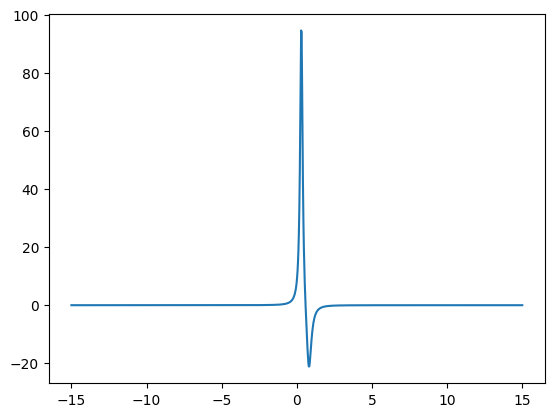

In [5]:
import matplotlib.pyplot as plt

def func(x):
    term1 = (x - 0.3) ** 2 + 0.01
    term2 = (x - 0.8) ** 2 + 0.04

    sol = (1 / term1) - (1 / term2)

    return sol

ridder(f= func, a= -10, b= 10)

x = np.linspace(-15, 15, 1000)
y = func(x)

plt.plot(x, y)
plt.show()



## método newton raphson

In [6]:
def newton_raphson(f: Callable, prime: Callable, x, tol= 1e-10, max_iter = 100):

    for i in range(max_iter):

        fx = f(x)
        dx = prime(x)

        x_old = x
        x -= fx / dx

        if abs(x - x_old) < tol:
            print(f'encontrada la raiz en {i} iteraciones')
            return x
        
    return (f'no se ha encontrado la raiz en {max_iter} iteraciones')

In [7]:
def f(x):
    return x ** 2 - 2

def prime(x):
    return 2 * x


newton_raphson(f, prime, 1 )

encontrada la raiz en 4 iteraciones


1.4142135623730951